<a href="https://colab.research.google.com/github/ecemay/catdogclassification/blob/main/NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [34]:
df=pd.read_csv("/content/drive/MyDrive/nba career longevity prediction/Train_data (1).csv")

In [35]:
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [36]:
df.shape

(1101, 20)

In [37]:
df.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'Target'],
      dtype='object')

In [38]:
df.isnull().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 172.2 KB


In [40]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,59.008156,16.928284,6.502344,2.511125,5.645747,43.912555,0.241959,0.767455,19.050425,1.241914,1.741848,70.495847,0.958240,1.937014,2.891927,1.472706,0.589403,0.344204,1.150499,0.499546
std,17.236886,8.034209,4.163856,1.611502,3.422292,6.106910,0.363008,1.017214,15.513640,0.937585,1.272047,10.381068,0.771344,1.342627,2.039694,1.376592,0.386147,0.418840,0.687706,0.500227
min,11.000000,3.100000,1.100000,0.400000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,46.223257,10.492268,3.587756,1.400000,3.200000,40.000000,0.000000,0.000000,0.000000,0.600000,0.900000,64.900000,0.400000,1.000000,1.400000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,59.387147,15.386486,5.200000,2.000000,4.600000,43.652785,0.100000,0.300000,22.600000,1.000000,1.400000,71.502462,0.700000,1.600000,2.273596,1.041951,0.500000,0.200000,0.988945,0.000000
75%,76.000000,21.830403,8.300000,3.200000,6.900000,47.700000,0.400000,1.195634,32.300000,1.600000,2.200000,77.436718,1.300000,2.500000,3.700000,1.900000,0.800000,0.400000,1.400000,1.000000
max,82.000000,40.900000,24.300000,9.000000,18.900000,73.700000,2.300000,6.500000,100.000000,7.500000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.200000,1.000000


In [41]:
correlation=df.corr()

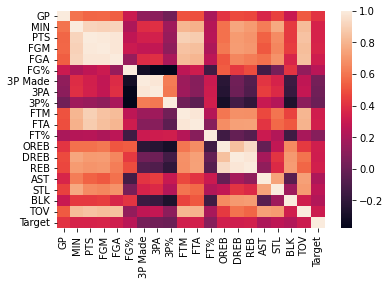

In [42]:
sns.heatmap(correlation)

In [43]:
df.drop(["FGA","3PA","OREB","DREB"], axis=1,inplace=True)

In [44]:
df.dtypes

GP         float64
MIN        float64
PTS        float64
FGM        float64
FG%        float64
3P Made    float64
3P%        float64
FTM        float64
FTA        float64
FT%        float64
REB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
Target       int64
dtype: object

** Information about the features and target

Float(18)

MIN:  Minutes Played

PTS: Number of points per game

FGM: Field goals made

FGA: Field goals attempt

FG%: field goals percent

3P Made: 3 point made

3PA: 3 points attempt

3P%: 3 point percent

FTM: Free throw made

FTA: Free throw attempts

FT%: Free throw percent

OREB: Offensive rebounds

DREB: Defensive rebounds

REB: Rebounds

AST: Assists

STL: Steals

BLK: Blocks

TOV: Turnovers
Int(1)

Target: 0 if career years played < 5, 1 if career years played >= 5

In [45]:
df['3P Made'].mean()

0.24195932134423254

In [46]:
df.head()

,GP,MIN,PTS,FGM,FG%,3P Made,3P%,FTM,FTA,FT%,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,51.0,0.2,50.0,0.7,0.8,78.0,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,35.3,0.5,25.8,0.5,0.9,55.2,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,49.7,0.0,0.0,1.2,1.9,61.5,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,37.4,1.3,32.9,2.8,3.3,85.0,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,36.7,0.0,25.0,1.9,3.1,61.7,1.2,1.9,1.1,0.2,1.7,0


GP             AxesSubplot(0.125,0.71587;0.168478x0.16413)
MIN         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
PTS         AxesSubplot(0.529348,0.71587;0.168478x0.16413)
FGM         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
FG%           AxesSubplot(0.125,0.518913;0.168478x0.16413)
3P Made    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
3P%        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
FTM        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
FTA           AxesSubplot(0.125,0.321957;0.168478x0.16413)
FT%        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
REB        AxesSubplot(0.529348,0.321957;0.168478x0.16413)
AST        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
STL              AxesSubplot(0.125,0.125;0.168478x0.16413)
BLK           AxesSubplot(0.327174,0.125;0.168478x0.16413)
TOV           AxesSubplot(0.529348,0.125;0.168478x0.16413)
Target        AxesSubplot(0.731522,0.125;0.168478x0.16413)
dtype: object

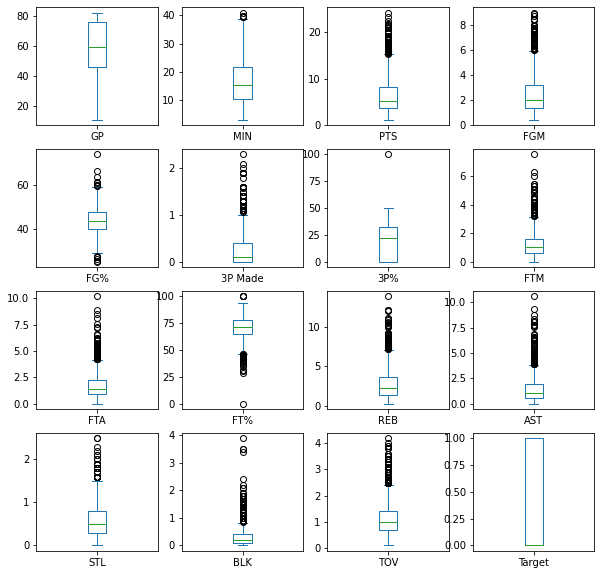

In [47]:
df.plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10))

In [48]:
# we had outlier values almost in every column except that target and gp columns

outlier_columns=['MIN', 'PTS', 'FGM', 'FG%', '3P Made', '3P%', 'FTM',
       'FTA', 'FT%', 'REB', 'AST', 'STL', 'BLK', 'TOV']

def outliers(data,index):
  Q1=data.quantile(0.25)
  Q3=data.quantile(0.75)
  IQR=Q3-Q1
  data=data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))]
  return data
    
for i in df.iloc[:,:14]:
  df=outliers(df,i)



GP             AxesSubplot(0.125,0.71587;0.168478x0.16413)
MIN         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
PTS         AxesSubplot(0.529348,0.71587;0.168478x0.16413)
FGM         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
FG%           AxesSubplot(0.125,0.518913;0.168478x0.16413)
3P Made    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
3P%        AxesSubplot(0.529348,0.518913;0.168478x0.16413)
FTM        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
FTA           AxesSubplot(0.125,0.321957;0.168478x0.16413)
FT%        AxesSubplot(0.327174,0.321957;0.168478x0.16413)
REB        AxesSubplot(0.529348,0.321957;0.168478x0.16413)
AST        AxesSubplot(0.731522,0.321957;0.168478x0.16413)
STL              AxesSubplot(0.125,0.125;0.168478x0.16413)
BLK           AxesSubplot(0.327174,0.125;0.168478x0.16413)
TOV           AxesSubplot(0.529348,0.125;0.168478x0.16413)
Target        AxesSubplot(0.731522,0.125;0.168478x0.16413)
dtype: object

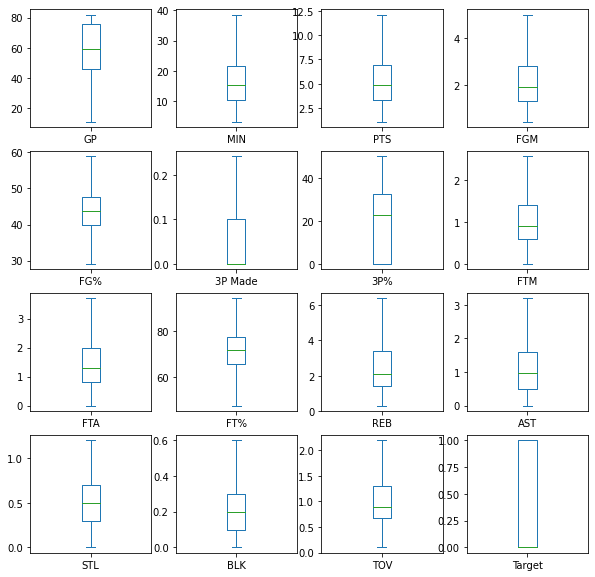

In [49]:
df.plot(kind="box", subplots=True, layout=(4,4), figsize=(10,10))

In [50]:
df.head()

,GP,MIN,PTS,FGM,FG%,3P Made,3P%,FTM,FTA,FT%,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,51.0,0.2,50.0,0.7,0.8,78.0,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,35.3,NaN,25.8,0.5,0.9,55.2,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,49.7,0.0,0.0,1.2,1.9,61.5,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,37.4,NaN,32.9,NaN,3.3,85.0,2.4,NaN,NaN,0.1,2.2,1
4,58.0,18.4,5.8,1.9,36.7,0.0,25.0,1.9,3.1,61.7,1.2,1.9,1.1,0.2,1.7,0


In [51]:
df.isnull().sum()

GP           0
MIN          5
PTS        119
FGM        103
FG%         16
3P Made    350
3P%          1
FTM         96
FTA         75
FT%         29
REB         72
AST         98
STL         69
BLK        151
TOV         84
Target       0
dtype: int64

In [52]:
target,features=df.Target, df.drop('Target',axis=1)

In [53]:
target.head()

0    1
1    0
2    0
3    1
4    0
Name: Target, dtype: int64

In [54]:
features.head()

,GP,MIN,PTS,FGM,FG%,3P Made,3P%,FTM,FTA,FT%,REB,AST,STL,BLK,TOV
0,59.0,12.8,3.4,1.3,51.0,0.2,50.0,0.7,0.8,78.0,3.3,0.5,0.3,0.4,0.5
1,31.0,10.7,3.4,1.2,35.3,NaN,25.8,0.5,0.9,55.2,1.4,0.4,0.3,0.1,0.2
2,48.0,9.3,4.5,1.7,49.7,0.0,0.0,1.2,1.9,61.5,1.2,0.8,0.5,0.4,1.0
3,80.0,27.7,11.2,3.5,37.4,NaN,32.9,NaN,3.3,85.0,2.4,NaN,NaN,0.1,2.2
4,58.0,18.4,5.8,1.9,36.7,0.0,25.0,1.9,3.1,61.7,1.2,1.9,1.1,0.2,1.7


In [55]:
mean_column=features['MIN'].sum()/len(features)
print(mean_column)
features['MIN']=features['MIN'].fillna(features['MIN'].mean())

16.747629885599455


In [56]:
features.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FG%', '3P Made', '3P%', 'FTM', 'FTA', 'FT%',
       'REB', 'AST', 'STL', 'BLK', 'TOV'],
      dtype='object')

In [57]:
def calculate_mean(data,columns):
    data[columns]=data[columns].fillna(data[columns].mean())
for i in features.columns:
    features[i]=features[i].fillna(features[i].mean())
features.head()
     

,GP,MIN,PTS,FGM,FG%,3P Made,3P%,FTM,FTA,FT%,REB,AST,STL,BLK,TOV
0,59.0,12.8,3.4,1.3,51.0,0.200000,50.0,0.700000,0.8,78.0,3.3,0.50000,0.300000,0.4,0.5
1,31.0,10.7,3.4,1.2,35.3,0.042361,25.8,0.500000,0.9,55.2,1.4,0.40000,0.300000,0.1,0.2
2,48.0,9.3,4.5,1.7,49.7,0.000000,0.0,1.200000,1.9,61.5,1.2,0.80000,0.500000,0.4,1.0
3,80.0,27.7,11.2,3.5,37.4,0.042361,32.9,1.023766,3.3,85.0,2.4,1.14086,0.520768,0.1,2.2
4,58.0,18.4,5.8,1.9,36.7,0.000000,25.0,1.900000,3.1,61.7,1.2,1.90000,1.100000,0.2,1.7


In [58]:

from sklearn.preprocessing import StandardScaler


scaler=StandardScaler()
scaler.fit(features)
features=scaler.transform(features)

In [59]:
features=pd.DataFrame(features)

In [60]:
features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.000473,-0.510616,-0.817861,-0.824227,1.258844,2.878387e+00,2.025896,-0.589438,-0.858836,0.769981,0.579186,-8.743479e-01,-0.817697,1.252943,-1.123558
1,-1.625635,-0.777089,-0.817861,-0.925363,-1.501677,-4.561199e-15,0.445571,-0.953551,-0.734513,-1.778681,-0.808783,-1.010781e+00,-0.817697,-0.740445,-1.789659
2,-0.638930,-0.954737,-0.359892,-0.419683,1.030266,-7.734909e-01,-1.239238,0.320845,0.508720,-1.074446,-0.954885,-4.650472e-01,-0.076921,1.252943,-0.013390
3,1.218398,1.380070,2.429555,1.400766,-1.132435,-4.561199e-15,0.909220,0.000000,2.249245,1.552465,-0.078273,1.817660e-15,0.000000,-0.740445,2.651013
4,-0.058515,0.199977,0.181344,-0.217411,-1.255516,-7.734909e-01,0.393329,1.595241,2.000599,-1.052089,-0.954885,1.035722e+00,2.145405,-0.075983,1.540845


In [61]:
features.isnull().sum().sum()

0

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [63]:
X = features
y = target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [68]:
y_val.shape

(221,)

In [32]:
model_logistic = LogisticRegression()
model_tree = DecisionTreeClassifier()
model_forest = RandomForestClassifier()
model_linearsvc = LinearSVC()
model_gauuss = GaussianNB()
mlp = MLPClassifier(hidden_layer_sizes=1, activation = "logistic")
mlp1 = MLPClassifier(hidden_layer_sizes=100, activation = "logistic")
mlp2 = MLPClassifier(hidden_layer_sizes=1000, activation = "logistic")

In [70]:
model_logistic.fit(X_train, y_train)
model_tree.fit(X_train, y_train)
model_forest.fit(X_train, y_train)
model_linearsvc.fit(X_train, y_train)
model_gauuss.fit(X_train, y_train)
mlp.fit(X_train, y_train)
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='logistic', hidden_layer_sizes=1000)

In [71]:
logistic_score = model_logistic.score(X_train, y_train)
tree_score =  model_tree.score(X_train, y_train)
forest_score =  model_forest.score(X_train, y_train)
linearsvc_score =  model_linearsvc.score(X_train, y_train)
gauss_score = model_gauuss.score(X_train, y_train)
mlp_score = mlp.score(X_train, y_train)
mlp1_score = mlp2.score(X_train, y_train)
mlp2_score = mlp2.score(X_train, y_train)

In [72]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression','Decision Tree','Random Forest','Support Vector Machines',  
               'Naive Bayes', 'mlp-1-layer','mlp-100layers','mlp-1000-layers' 
              ],
    'Score': [logistic_score, tree_score, forest_score, 
              linearsvc_score, gauss_score, mlp_score, 
              mlp1_score, mlp2_score]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
0.992045,Decision Tree
0.992045,Random Forest
0.697727,Support Vector Machines
0.695455,Logistic Regression
0.694318,mlp-100layers
0.694318,mlp-1000-layers
0.689773,mlp-1-layer
0.680682,Naive Bayes


In [73]:
predict_logistic= model_logistic.predict(X_val)
predict_tree = model_tree.predict(X_val)
predict_forest = model_forest.predict(X_val)
predict_svmlinear = model_linearsvc.predict(X_val)
predict_gauss = model_gauuss.predict(X_val)
predictions_NN = mlp.predict(X_val)
predictions_NN1 = mlp1.predict(X_val)
predictions_NN2 = mlp2.predict(X_val)

In [76]:
print("Logistic Regression")
print(classification_report(y_val,predict_logistic))
print("tree")
print( classification_report(y_val,predict_tree))
print("forest")
print( classification_report(y_val,predict_forest))
print("svm")
print(classification_report(y_val,predict_svmlinear))
print("gauss")
print(classification_report(y_val,predict_gauss))
print("NN")
print(classification_report(y_val,predictions_NN))
print("NN1")
print(classification_report(y_val,predictions_NN1))
print("NN2")
print(classification_report(y_val,predictions_NN2))

Logistic Regression
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       109
           1       0.65      0.71      0.68       112

    accuracy                           0.66       221
   macro avg       0.66      0.66      0.66       221
weighted avg       0.66      0.66      0.66       221

tree
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       109
           1       0.70      0.70      0.70       112

    accuracy                           0.69       221
   macro avg       0.69      0.69      0.69       221
weighted avg       0.69      0.69      0.69       221

forest
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       109
           1       0.73      0.74      0.73       112

    accuracy                           0.73       221
   macro avg       0.73      0.73      0.73       221
weighted avg       0.73      0.73      0.7

In [77]:
best_model = RandomForestClassifier()

In [79]:
best_model.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
prediction =  best_model.predict(features)

In [83]:
results=pd.DataFrame({"label":prediction})
results.to_csv("results.csv",index=False,header=1)

In [84]:
prediction

array([1, 0, 0, ..., 0, 0, 1])

In [85]:
from google.colab import files
files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>